# **SVM - Kernel comparison**

## Kernel interpretation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

(250, 2) (250,)


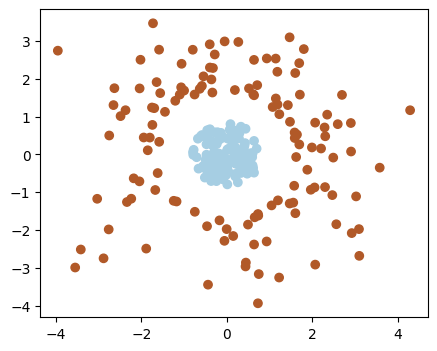

In [26]:
X, Y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)
print(X.shape, Y.shape)
X[Y==0]=X[Y==0]*0.5 #Alejar los puntos
_,ax = plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c = Y , cmap="Paired")

In [27]:
Z = X[:,0]**2 + X[:,1]**2
print(Z.shape)

(250,)


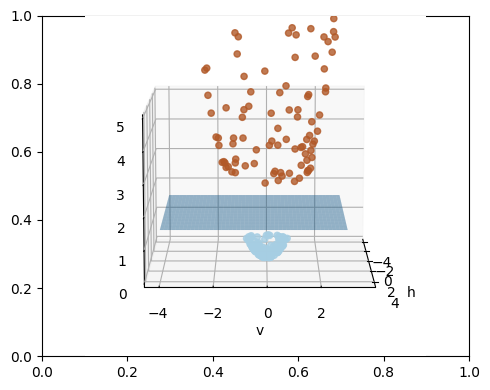

In [45]:
f,_ = plt.subplots(figsize=(5,4)) #Grafica de 3 dimensiones
ax=f.add_subplot(projection='3d')
ax.view_init(10, 0) # Grados de vista de la grafica
ax.scatter3D( X[:,0] , X[:,1] , Z , c = Y , alpha=0.8, cmap="Paired")
plt.tight_layout()
ax.set_zlim(0,5)
ax.set_xlabel('h')
ax.set_ylabel('v')

h_grid, v_grid = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,3,50)) # grid
z_grid = np.ones(h_grid.shape)*1.5 # vector de 1.5
ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)#plano

In [59]:
# Sve all
for angulo in range(0,91,5):
  f,_ = plt.subplots(figsize=(8,7)) #Grafica de 3 dimensiones
  ax=f.add_subplot(projection='3d')
  ax.view_init(angulo, 0) # Grados de vista de la grafica
  ax.scatter3D( X[:,0] , X[:,1] , Z , c = Y , alpha=0.8, cmap="Paired")
  plt.tight_layout()
  ax.set_zlim(0,5)
  ax.set_xlabel('h')
  ax.set_ylabel('v')

  h_grid, v_grid = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,3,50)) # grid
  z_grid = np.ones(h_grid.shape)*1.5 # vector de 1.5
  ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)#plano

  plt.savefig("imgs/{0}.png".format(angulo))



Output hidden; open in https://colab.research.google.com to view.

In [60]:
import os
from PIL import Image
from natsort import natsorted, ns
# Save a gif
print(natsorted(os.listdir('imgs/')))

list_images=[]

for img in natsorted(os.listdir('imgs/')):
  image = Image.open('imgs/'+img)
  list_images.append(image)

image.save("animation_.gif", save_all=True, append_images=list_images, duration=200, loop=0)

['0.png', '5.png', '10.png', '15.png', '20.png', '25.png', '30.png', '35.png', '40.png', '45.png', '50.png', '55.png', '60.png', '65.png', '70.png', '75.png', '80.png', '85.png', '90.png']


## SVM

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

In [ ]:
#%cd ruta hasta la carpeta maching learning
from Tools.utils import plot_decision_boundary

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

(250, 2) (250,)


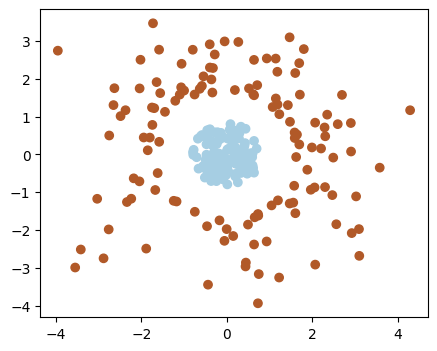

In [61]:
X, Y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)
print(X.shape, Y.shape)
X[Y==0]=X[Y==0]*0.5 #Alejar los puntos
_,ax = plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c = Y , cmap="Paired")

In [ ]:
kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (15,5))

# fit the model
for i, kernel in enumerate(kernels) :
    #
    clf = SVC(kernel = kernel , gamma = 1)
    clf.fit( X , Y )
#############################
    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape( _ )
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
    axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets